In [1]:
%pip install numpy matplotlib scikit-learn tensorflow pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import pandas as pd
import openpyxl

Inflation Data: [9.9 19.71 12.77 5.18 3.76 0.88 2.48 1.9 2.4 3.9 5.3 '5.93' '5.70' '4.10'
 '3.52' '5.00' '5.71' '5.95' '5.61' '7.89' '0.30' '1.60' '1.60' '0.70'
 '1.80' '2.70' '4.50' '4.70' '2.30' '5.50' '-0.90' '3.30' '3.81' '3.01'
 '2.18' '1.90' '-0.90' '0.18' '0.67' '1.07' '0.70' '-0.85' '1.23' '6.08'
 '1.23']
Current Account Data: [-7.6 -6.4 -7.4 -2.8 -7.2 -5.0 -3.9 0.7 -0.6 -2.4 -3.3 '-8.3' '-7.5'
 '-5.5' '-4.9' '-5.4' '-7.9' '-7.9' '-2.0' '12.7' '10.2' '9.2' '7.0' '6.8'
 '7.3' '6.2' '-4.0' '1.0' '5.9' '0.3' '7.9' '3.3' '2.6' '-1.2' '-2.0'
 '2.9' '6.9' '10.5' '9.6' '5.6' '7.0' '4.2' '-2.1' '-3.5' '1.4']


c:\Users\TERTLE-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.4038
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7714 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6944 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8704 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5695 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3389  
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0345 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5257 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6274 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7593 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7720 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3178 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1450 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9552 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2486 
Epoch 16/100
6/6 ━━

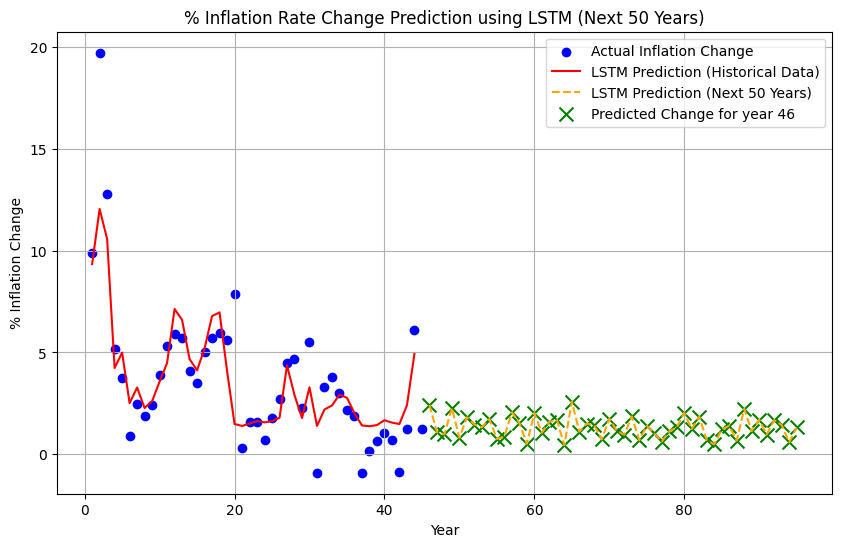

Mean Absolute Error (MAE): 1.58
Mean Squared Error (MSE): 3.46
Root Mean Squared Error (RMSE): 1.86


TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [ ]:


sheet_id = "1_NMyB8X2HOFj09tU6rtjmRwEuT6E1fK1El9E-ceA0Pw"
sheet_name = "Sheet1"   # เปลี่ยนเป็นชื่อ Sheet ที่ต้องการ ถ้า sheet ชื่ออื่นให้ใส่ตรงนี้

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# อ่านเข้า pandas
df = pd.read_csv(url)

# เลือกแถวที่ 14 และ 24 และแปลงค่าเป็น float
inflation_change_data = df.iloc[13, 2:47].astype(float).values
current_account_data = df.iloc[23, 2:47].astype(float).values

# แสดงข้อมูลที่เลือก
print("Inflation Data:", inflation_change_data)
print("Current Account Data:", current_account_data)

# รวมข้อมูลทั้งสองปัจจัยเป็น 2D array
combined_data = np.column_stack((inflation_change_data, current_account_data))

# สร้างลำดับข้อมูล
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # เป้าหมายคือ % การเปลี่ยนแปลงของอัตราเงินเฟ้อ
    return np.array(X), np.array(y)

# ใช้ time_step = 1 เพื่อความง่าย
time_step = 1
X, y = create_dataset(combined_data, time_step)

# ปรับขนาดข้อมูลให้อยู่ในช่วง [0, 1]
scaler_X = MinMaxScaler(feature_range=(0, 10))
scaler_y = MinMaxScaler(feature_range=(0, 10))
X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# ปรับรูปแบบข้อมูลให้เป็น [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# สร้างโมเดล LSTM ด้วยชั้น LSTM สองชั้น
model = Sequential()

# ชั้น LSTM แรก - ตั้งค่า return_sequences=True เพื่อส่งค่าผลลัพธ์ไปยังชั้นถัดไป
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# ชั้น LSTM ที่สอง
model.add(LSTM(units=100))  # เปลี่ยนจำนวน units ได้ตามต้องการ

# ชั้น Dense สุดท้าย
model.add(Dense(1))

# ปรับ optimizer โดยกำหนดค่า learning rate ที่ต้องการ (เช่น 0.0005)
optimizer = Adam(learning_rate=0.001)

# คอมไพล์โมเดลด้วย optimizer ที่ปรับแล้ว
model.compile(optimizer=optimizer, loss='mean_squared_error')

# ฝึกโมเดล
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

# คาดการณ์ข้อมูล
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# จำนวนปีที่ต้องการคาดการณ์
n_years = 50 # รับค่าจำนวนปีจากผู้ใช้
future_predictions = []

# เริ่มจากข้อมูลล่าสุด
last_data = combined_data[-time_step:]

# ค่ามาตรฐานของ noise (สามารถปรับได้)
noise_std = 0.5 # กำหนดค่าที่มากขึ้นหรือน้อยลงตามที่ต้องการ
future_predictions = []

for i in range(n_years):
    # ปรับขนาดข้อมูลให้สอดคล้องกับ scaler
    last_data_scaled = scaler_X.transform(last_data)
    last_data_scaled = np.reshape(last_data_scaled, (1, time_step, last_data_scaled.shape[1]))
    
    # คาดการณ์ปีถัดไป
    next_year_scaled = model.predict(last_data_scaled)
    next_year = scaler_y.inverse_transform(next_year_scaled)[0][0]
    
    # เพิ่มความผันผวนแบบสุ่ม
    volatility = np.random.normal(0, noise_std)  # สร้างความผันผวนแบบสุ่ม
    next_year += volatility  # ผสมผลคาดการณ์กับความผันผวน

    # เก็บผลการคาดการณ์
    future_predictions.append(next_year)
    
    # ปรับ last_data เพื่อใช้ในการคาดการณ์ปีถัดไป
    next_current_account = current_account_data[len(inflation_change_data) + i] if len(inflation_change_data) + i < len(current_account_data) else next_year * 10
    next_data = np.append(last_data[1:], [[next_year, next_current_account]], axis=0)
    last_data = next_data

# แสดงผลการคาดการณ์
for i, pred in enumerate(future_predictions):
    print(f'Predicted % Inflation Change for year {len(inflation_change_data) + i + 1}: {pred:.2f}')

# พล็อตกราฟการคาดการณ์ตามจำนวนปีที่กำหนด
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลจริง (% การเปลี่ยนแปลงของอัตราเงินเฟ้อ)
plt.scatter(np.arange(1, len(inflation_change_data) + 1), inflation_change_data, color='blue', label='Actual Inflation Change')

# ตรวจสอบขนาดของ combined_data ก่อน reshape
print(f"Original combined data shape: {combined_data.shape}")

# ตรวจสอบว่าจำนวนข้อมูลเพียงพอสำหรับการสร้างลำดับตาม time step หรือไม่
if len(combined_data) > time_step:
    # แปลงข้อมูลเต็มรูปแบบและปรับขนาดใหม่สำหรับ time step = 5
    X_full_scaled = scaler_X.transform(np.reshape(combined_data[:-1], (-1, combined_data.shape[1])))
    
    # แก้ไข reshape ให้ใช้เฉพาะข้อมูลที่สามารถแบ่งได้ตาม time step
    X_full_scaled = np.reshape(X_full_scaled[:len(X_full_scaled) - len(X_full_scaled) % time_step], (-1, time_step, combined_data.shape[1]))
    print(f"Reshaped X_full_scaled shape: {X_full_scaled.shape}")

    # ทำนายข้อมูลในอดีต (historical data) โดยใช้โมเดล
    predicted_full_scaled = model.predict(X_full_scaled)
    predicted_full = scaler_y.inverse_transform(predicted_full_scaled)

    # พล็อตกราฟสำหรับ historical data และการคาดการณ์
    plt.plot(np.arange(1, len(predicted_full) + 1), predicted_full, color='red', label='LSTM Prediction (Historical Data)')
else:
    print(f"Not enough data for the chosen time_step ({time_step})")

# พล็อตการคาดการณ์ในจำนวนปีที่กำหนด
years = np.arange(len(inflation_change_data) + 1, len(inflation_change_data) + n_years + 1)
plt.plot(years, future_predictions, color='orange', linestyle='--', label=f'LSTM Prediction (Next {n_years} Years)')

# พล็อตจุดการคาดการณ์ในแต่ละปีถัดไป
for i in range(n_years):
    plt.scatter(len(inflation_change_data) + i + 1, future_predictions[i], color='green', marker='x', s=100, label=f'Predicted Change for year {len(inflation_change_data) + i + 1}' if i == 0 else "")

# เพิ่มชื่อและรายละเอียดกราฟ
plt.title(f'% Inflation Rate Change Prediction using LSTM (Next {n_years} Years)')
plt.xlabel('Year')
plt.ylabel('% Inflation Change')
plt.legend()
plt.grid(True)
plt.show()

# วัด Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# วัด Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# วัด Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# กำหนดเปอร์เซ็นต์ความแตกต่างที่ยอมรับได้ (เช่น 10%)
tolerance = 0.03

# คำนวณจำนวนที่คาดการณ์ "ถูกต้อง"
correct_predictions = np.sum(np.abs(predicted_full - inflation_change_data) / np.abs(inflation_change_data) <= tolerance)

# คำนวณ Accuracy เป็นเปอร์เซ็นต์
accuracy = correct_predictions / len(inflation_change_data) * 100
print(f'Accuracy: {accuracy:.2f}%')

# คำนวณ MAE และ RMSE ระหว่างข้อมูลจริงและการคาดการณ์ historical data
if len(predicted_full) == len(inflation_change_data):
    mae = mean_absolute_error(inflation_change_data, predicted_full)
    rmse = np.sqrt(mean_squared_error(inflation_change_data, predicted_full))
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
else:
    print(f"Shape mismatch: predicted_full ({len(predicted_full)}) vs inflation_change_data ({len(inflation_change_data)})")


   



print(future_predictions)


def predict(n_years,initial_amount):

    # ตรวจสอบว่าค่า n_years อยู่ในช่วง 1 ถึง 50  
    if n_years > 50:
        n_years = 50
    elif n_years < 1:
        n_years = 1

    # คำนวณเงินหลังจากการบวกเงินเฟ้อในแต่ละปี
    amount = initial_amount
    result = []  # เพื่อเก็บจำนวนเงินของแต่ละปี

    for i in range(n_years):
        inflat_rate = future_predictions[i] / 100  # เปลี่ยนจาก % เป็นทศนิยม
        amount += amount*inflat_rate # บวกเปอร์เซ็นต์เงินเฟ้อในปีนั้น
        result.append({
            'year': i+1,
            'inflation_rate': future_predictions[i],
            'amount': round(amount,2) # ปัดเศษให้เหลือ 2 ตำแหน่ง
        })
    
    return result




